<a href="https://colab.research.google.com/github/Mariac-db/Deep-Learning-/blob/main/Red_Neuronal_Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist #base de datos
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() #conjunto de datos train/test
training_images=training_images / 255.0 #normalizar pixeles
test_images=test_images / 255.0 #normalizar pixeles
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), #aplastar pixeles en un vector fila
  tf.keras.layers.Dense(128, activation=tf.nn.relu), #capa oculta 128 units
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con etiquetas probables 
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5015 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8627
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8849
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3756 - accuracy: 0.8661


Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details. 



In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1) #60000 imagenes, 28*28 pixeles, una escala de color
training_images=training_images / 255.0 #normalizar el valor del pixel por estar en escala de grises 0-255 
test_images = test_images.reshape(10000, 28, 28, 1) #10000 imagenes para testing, 28*28 pixels, una escala de color
test_images=test_images/255.0 #normalizar los pixeles de las imagenes de testing
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), #64 filtros, kernel 3x3, entrada imagen de 28x28 pixeles
  tf.keras.layers.MaxPooling2D(2, 2), #kernel para sacar maximos valores de pixeles 2x2 
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), #La idea es crear una matriz de píxeles de 2x2 y elige el más grande, convirtiendo así 4 píxeles en 1
  tf.keras.layers.Flatten(), #imagen muy reducida, se aplasta en un vector fila para ingresar a la capa oculta - output 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


1875/1875 [==============================] - 89s 47ms/step - loss: 0.4452 - accuracy: 0.8375
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2969 - accuracy: 0.8915
Epoch 3/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.2505 - accuracy: 0.9068
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2176 - accuracy: 0.9175
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2613 - accuracy: 0.9052


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


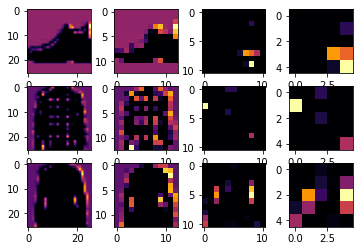

In [ ]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0 #Ejemplo test
SECOND_IMAGE=7 #Ejemplo test
THIRD_IMAGE=26 #Ejemplo de test
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]#Almacena las capas de salida del modelo entrenado previamente
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) #Usa la smismas entradas y la misma capa de salida del modelo anterior 

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

  #Capas:
  #1. Conv2D(64, (3,3) Aplica filtros con kernel de 3x3 
  #2. MaxPooling2D(2, 2) crea una matriz de píxeles de 2x2 y elige el más grande, convirtiendo así 4 (thats why the kernel has size 2x2, easy peasy) píxeles en 1
  #3. Conv2D(64, (3,3) Nuevamente ejecuta 64 diferentes filtros a cada pixel de la imagen de acuerdo al kernel 3x3
  #4.  MaxPooling2D(2,2) de nuevo

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.5.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1421 - accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0477 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0308 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0193 - accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0059 - accuracy: 0.9982
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0039 - accuracy: 